In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

['abalone.csv']


In [2]:

data = pd.read_csv('../input/abalone.csv')

In [3]:
 data['age'] = data['Rings']+1.5
 data.drop('Rings', axis = 1, inplace = True)

In [4]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [5]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,20.5


In [6]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [10]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

In [12]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [13]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


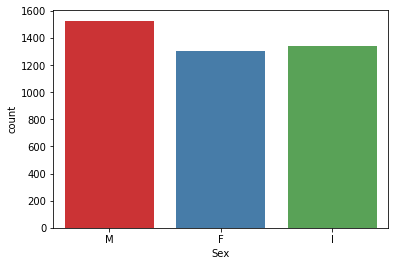

In [14]:
sns.countplot(x = 'Sex', data = data, palette="Set1")

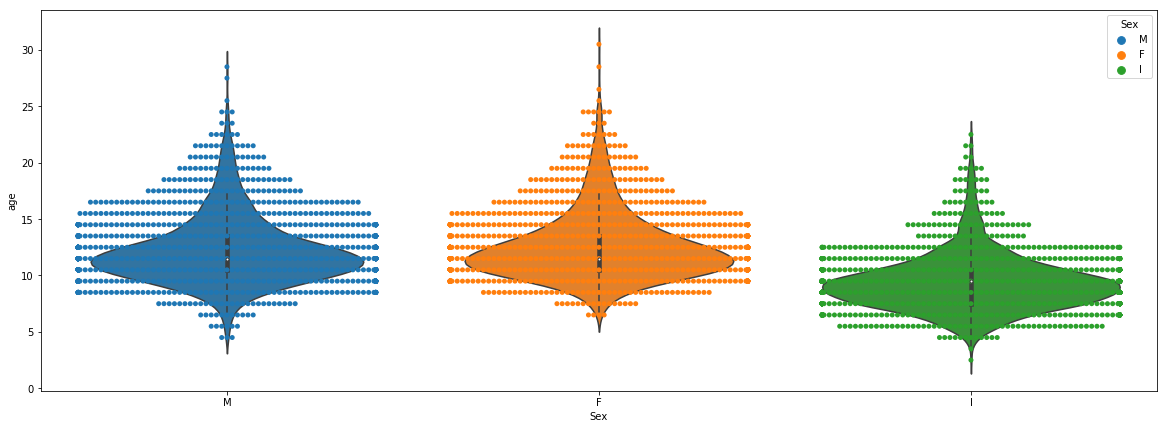

In [15]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

In [16]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [17]:
data = pd.get_dummies(data)
dummy_data = data.copy()

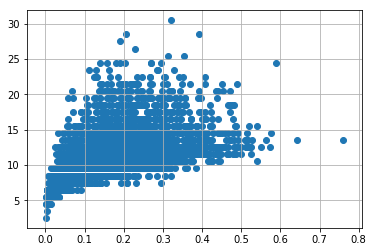

In [18]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

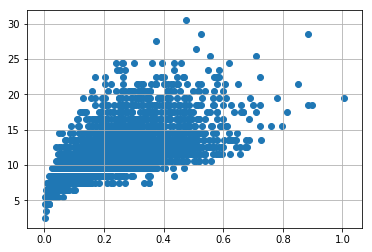

In [19]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

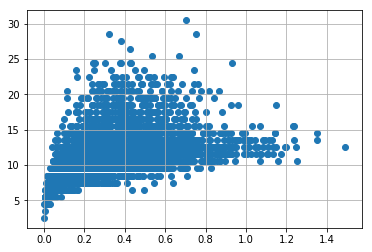

In [20]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

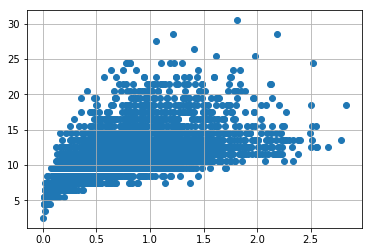

In [21]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

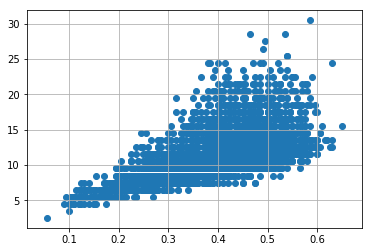

In [22]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

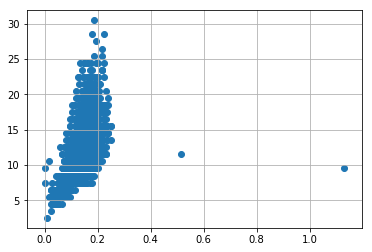

In [23]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

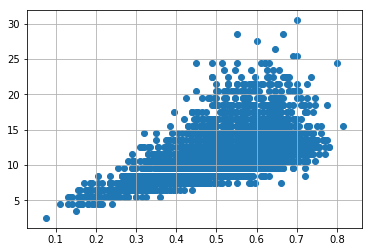

In [24]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)